In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
Most_recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Most_recent_data
# Activity example: Most_recent_dattravel_short = session.query(Travel).order_by(Travel.distance).first()

('2017-08-23',)

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_yr = dt.data(2017, 8, 23) - dt.timedelta( days= 365)

# Perform a query to retrieve the data and precipitation scores
Scores = session.query()
results= session.query(Measurement.date, Measurement.prcp)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.dataframe(Scores, columns = ['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values("date")
precip_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot 
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"])

plt.show()

AttributeError: module 'datetime' has no attribute 'data'

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
.describe 

SyntaxError: invalid syntax (3831421406.py, line 2)

# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
Total_stations = session.query(Station).count()
Total_stations

# Activity example: total_count = session.query(Sunshine).distinct().count()
# print(total_count)

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

Most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Most_active_station

#func.count(): Using func.count() without any arguments counts all rows in the group, which is sufficient in this context


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
#Answer the following question: which station id has the greatest number of observations?

# Station USC00519281 has the greatest number of observations with 2772. 

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station_temp = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == 'USC00519281').all()
Station_temp 
#tobs as a column label
# Most observation station 'USC00519281', 2772), 
# Use functions such as func.min, func.max, and func.avg in your query

[(54.0, 85.0, 71.66378066378067)]

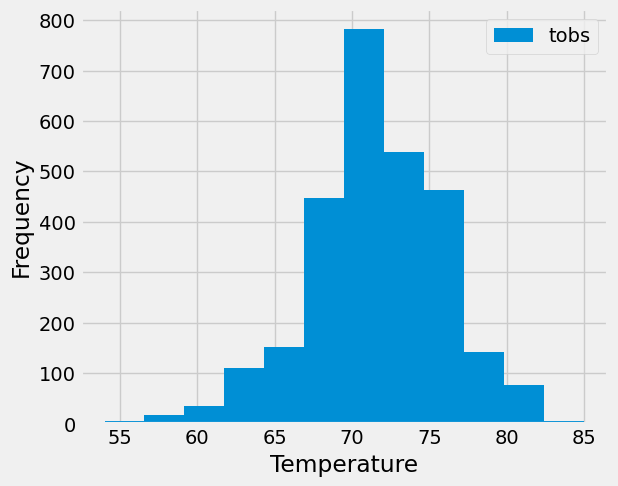

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Observation_results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')
    
#Plot 
high_station_temp = pd.DataFrame(Observation_results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


# Close Session

In [16]:
# Close Session
session.close()